In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import warnings

from pathlib import Path 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy import stats
from scipy.stats import norm
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans

In [254]:
warnings.filterwarnings("ignore")

# Part I

In [255]:
df1 = pd.read_excel('Worldbank_tech.xlsx')
df1

,country_name,country_code,internet,secure,export,import,telephone,hightech,mobile
0,Afghanistan,AFG,8.260000,1.414229,72.652794,9.053154,0.343677,NaN,61.577619
1,Albania,ALB,63.252933,37.727137,25.303169,11.124101,7.091628,15123662.0,106.380207
2,Algeria,DZA,38.200000,2.546228,59.256825,58.012028,8.041628,2449466.0,113.031094
3,American Samoa,ASM,NaN,72.022759,NaN,NaN,18.005690,NaN,NaN
4,Andorra,ADO,96.910000,1631.830630,NaN,NaN,47.992588,NaN,88.123533
...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,54.839137,453.781837,NaN,NaN,71.090491,NaN,NaN
213,West Bank and Gaza,WBG,57.424192,5.653368,44.171827,NaN,8.936393,5099724.0,77.624612
214,"Yemen, Rep.",YEM,25.099514,0.633567,56.462032,NaN,4.679835,2946931.0,67.980973
215,Zambia,ZMB,21.000000,4.317851,8.549899,NaN,0.748505,36503179.0,74.471778


In [256]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  217 non-null    object 
 1   country_code  217 non-null    object 
 2   internet      202 non-null    float64
 3   secure        207 non-null    float64
 4   export        144 non-null    float64
 5   import        123 non-null    float64
 6   telephone     209 non-null    float64
 7   hightech      135 non-null    float64
 8   mobile        204 non-null    float64
dtypes: float64(7), object(2)
memory usage: 15.4+ KB


In [257]:
df1.describe()

,internet,secure,export,import,telephone,hightech,mobile
count,202.000000,207.000000,144.000000,123.000000,209.000000,1.350000e+02,204.000000
mean,48.573173,462.902665,35.117770,37.832033,18.336921,1.490164e+10,107.722941
std,29.032396,1140.454338,21.362562,16.288464,18.339808,5.546809e+10,42.329588
min,1.083733,0.039753,1.661690,4.637094,0.000000,0.000000e+00,7.049953
25%,21.000000,5.499596,17.865648,25.473076,2.977923,7.652986e+06,80.555543
50%,50.219659,51.873000,31.909565,37.910044,13.395103,1.101963e+08,109.340703
75%,73.129675,326.749504,49.747775,48.733326,29.921121,3.190229e+09,130.444475
max,98.323610,10231.541925,86.376427,84.684010,128.092380,5.542729e+11,324.440813


All the types are correct

## Let us evaluate distribution of each var to further get correlations between columns. Highly correlated variables should not be included into consideration for clustering
### Hypotheses:

For each variable in {internet,
    secure,
    export,
    import,
    telephone,
    hightech,
    mobile}:

H1: The distribution of the variable is different from the normal distribution

H0: The distribution of the variable is not different from the normal distribution

p-value = 0.05

Kolmogorov test can be used here as the sizes of non-null values in columns is sufficiently high

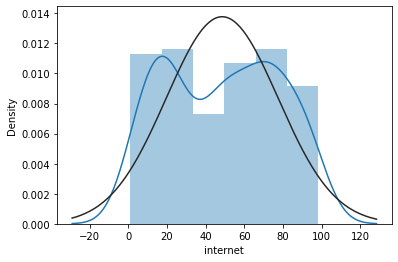

In [258]:
sns.distplot(df1.internet.dropna(), fit=norm)

In [259]:
stats.kstest(df1.internet.dropna(), 'norm', args=(df1.internet.dropna().mean(), df1.internet.dropna().std()))

KstestResult(statistic=0.10886666855469695, pvalue=0.015371542270892581)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

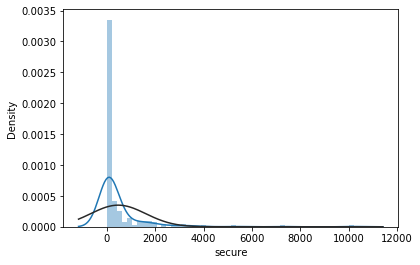

In [260]:
sns.distplot(df1.secure.dropna(), fit=norm)

In [261]:
stats.kstest(df1.secure.dropna(), 'norm', args=(df1.secure.dropna().mean(), df1.secure.dropna().std()))

KstestResult(statistic=0.34242334256563073, pvalue=3.579108443422713e-22)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

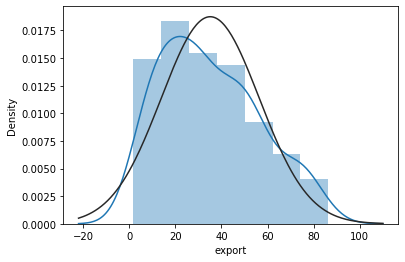

In [262]:
sns.distplot(df1.export.dropna(), fit=norm)

In [263]:
stats.kstest(df1.export.dropna(), 'norm', args=(df1.export.dropna().mean(), df1.export.dropna().std()))

KstestResult(statistic=0.08170543882038139, pvalue=0.27624088178878914)

#### Conclusion:
p-value > 0.05 => H1 is rejected at 5% => the distribution is not significantly different from normal

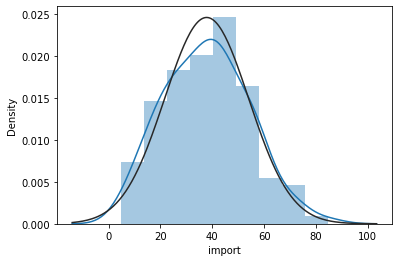

In [264]:
sns.distplot(df1["import"].dropna(), fit=norm)

In [265]:
stats.kstest(df1["import"].dropna(), 'norm', args=(df1["import"].dropna().mean(), df1["import"].dropna().std()))

KstestResult(statistic=0.04525457990092571, pvalue=0.9528462567028905)

#### Conclusion:
p-value > 0.05 => H1 is rejected at 5% => the distribution is not significantly different from normal

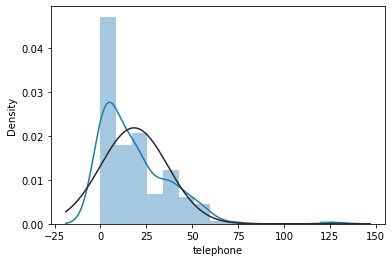

In [266]:
sns.distplot(df1["telephone"].dropna(), fit=norm)

In [267]:
stats.kstest(df1["telephone"].dropna(), 'norm', args=(df1["telephone"].dropna().mean(), df1["telephone"].dropna().std()))

KstestResult(statistic=0.15869335640260385, pvalue=4.5923673806337305e-05)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

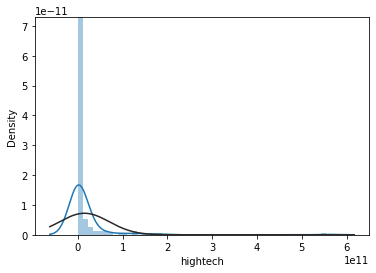

In [268]:
sns.distplot(df1["hightech"].dropna(), fit=norm)

In [269]:
stats.kstest(df1["hightech"].dropna(), 'norm', args=(df1["hightech"].dropna().mean(), df1["hightech"].dropna().std()))

KstestResult(statistic=0.3940985318749621, pvalue=2.0663807688315856e-19)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

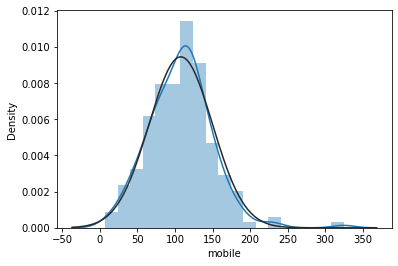

In [270]:
sns.distplot(df1["mobile"].dropna(), fit=norm)

In [271]:
stats.kstest(df1["mobile"].dropna(), 'norm', args=(df1["mobile"].dropna().mean(), df1["mobile"].dropna().std()))

KstestResult(statistic=0.06074503358473449, pvalue=0.42228509574243034)

#### Conclusion:
p-value > 0.05 => H1 is rejected at 5% => the distribution is not significantly different from normal

### Intermediary results:

Import, Export and Mobile have close to normal distribution, so Pearson should be used to check correlation.

Internet, secure, telephone and Hightech are not normally ditributed, so Spearman should be used.

### Evaluating correlations

In [272]:
df1[["import","export","mobile"]].corr() # Pearson is used by default

,import,export,mobile
import,1.000000,0.336778,0.200580
export,0.336778,1.000000,-0.152821
mobile,0.200580,-0.152821,1.000000


In [273]:
df1.corr(method="spearman")

,internet,secure,export,import,telephone,hightech,mobile
internet,1.000000,0.897148,0.039537,0.352640,0.857644,0.544918,0.554368
secure,0.897148,1.000000,0.048606,0.374637,0.844237,0.473058,0.524495
export,0.039537,0.048606,1.000000,0.327089,0.075506,0.413310,-0.043544
import,0.352640,0.374637,0.327089,1.000000,0.329603,0.323727,0.249106
telephone,0.857644,0.844237,0.075506,0.329603,1.000000,0.499978,0.499115
hightech,0.544918,0.473058,0.413310,0.323727,0.499978,1.000000,0.375299
mobile,0.554368,0.524495,-0.043544,0.249106,0.499115,0.375299,1.000000


### Results:

Internet, Secure and Telephone highly correlate with each other (>=85%), so only one of them should be chosen for clustering. Telephone has most non-null values, so it is better to choose this column among them. Other columns can be chosen based on quantity of their non-null values (the more values, the better). So, the following columns are chosen:
- telephone
- export
- hightech
- mobile

#### Normalizing columns data

In [274]:
df1['z_telephone'] = (df1['telephone'] - df1['telephone'].mean())/df1['telephone'].std()
df1['z_export'] = (df1['export'] - df1['export'].mean())/df1['export'].std()
df1['z_mobile'] = (df1['mobile'] - df1['mobile'].mean())/df1['mobile'].std()
df1['z_hightech'] = (df1['hightech'] - df1['hightech'].mean())/df1['hightech'].std()

#### Replacing NaN with mean values
Although it is possible to replace with 0, but from the data it can be understood that NaN means that the data was not obtained, so it is probably not 0. Therefore, such robust approximation is chosen

In [275]:
df1[['z_telephone', 'z_export', 'z_mobile', 'z_hightech']] = df1[['z_telephone', 'z_export', 'z_mobile', 'z_hightech']].fillna(df1[['z_telephone', 'z_export', 'z_mobile', 'z_hightech']].mean())

### Getting cluster number

#### Using Calinski-Harabasz Index to get number of clusters

In [276]:
from sklearn.metrics import calinski_harabasz_score
Z = linkage(df1[['z_telephone', 'z_export', 'z_mobile', 'z_hightech']], method='ward', metric='euclidean') 
labels = fcluster(Z, t=3, criterion='maxclust') #t defines the number of clusters
calinski_harabasz_score(df1[['z_telephone', 'z_export', 'z_mobile', 'z_hightech']], labels)

for k in range (2, 10):
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Number of clusters: {}, index {}'.format(k, calinski_harabasz_score(df1[['z_telephone', 'z_export', 'z_mobile', 'z_hightech']], labels)))

Number of clusters: 2, index 68.50422246627852
Number of clusters: 3, index 65.33164938804316
Number of clusters: 4, index 69.2036105752548
Number of clusters: 5, index 78.00142368883895
Number of clusters: 6, index 76.44977562260041
Number of clusters: 7, index 77.70366808191905
Number of clusters: 8, index 79.05147417426342
Number of clusters: 9, index 80.56474710003448


Seems that 5 clusters is an appropriate choice as we have to minimize the cluster number and maximize the index value. At cluster number = 5, there is an upward leap in index value at this number, after which there is a decrease in index value and insignificant increase further. The same is for size = 2, so both of these values can be chosen, therefore and additional analysis is needed.

#### Building a dendrogram to estimate the appropriate cluster number

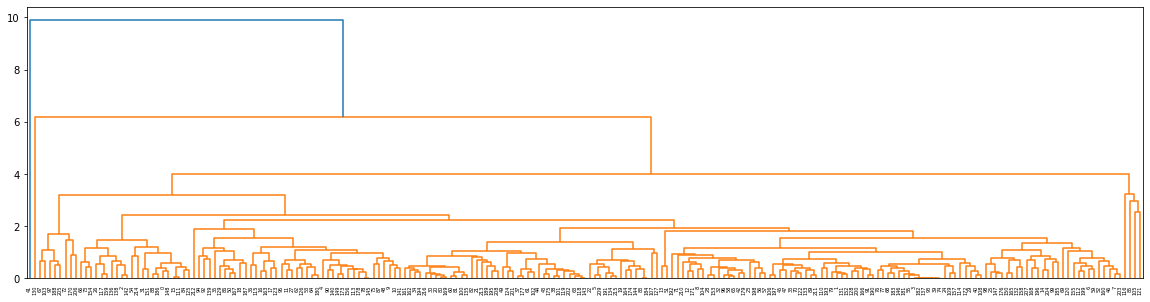

In [277]:
plt.figure(figsize=(20, 5))
dn = dendrogram(linkage(df1[['z_telephone', 'z_export', 'z_mobile', 'z_hightech']], 'average'))

Unfortunately, the dendrogram is quite overloaded to provide a proper analysis. According to a dendrogram, maximal number of clusters can reach up to hundreds, but the clusters with a high distance from each other can have a number from 2 to 8 approximately while clusters with the highest distance from each other vary from 2 to 4. Interestingly,that 2 clusters at the left side are significantly different from all other clusters so that they combine a cluster with another cluster only at the latest stages where no other possible combinations remain.
Let us take a more precise analysis to see how clusters are constructed by gradually increasing the cluster size.

#### Evaluating sizes of clusters

In [278]:
for i in range(2,9):
    labels = fcluster(Z, t=i, criterion='maxclust')
    (unique, counts) = numpy.unique(labels, return_counts=True)
    print(i,":\n",numpy.asarray((unique, counts)).T)

2 :
 [[  1 105]
 [  2 112]]
3 :
 [[  1 105]
 [  2 111]
 [  3   1]]
4 :
 [[  1 105]
 [  2  41]
 [  3  70]
 [  4   1]]
5 :
 [[ 1 20]
 [ 2 85]
 [ 3 41]
 [ 4 70]
 [ 5  1]]
6 :
 [[ 1 20]
 [ 2 85]
 [ 3 41]
 [ 4 54]
 [ 5 16]
 [ 6  1]]
7 :
 [[ 1 20]
 [ 2 25]
 [ 3 60]
 [ 4 41]
 [ 5 54]
 [ 6 16]
 [ 7  1]]
8 :
 [[ 1 20]
 [ 2 25]
 [ 3 60]
 [ 4 13]
 [ 5 28]
 [ 6 54]
 [ 7 16]
 [ 8  1]]


As is seen, starting from the cluster 3, we have a cluster with only one value which seems not very promising - maybe this item has extreme values, so it seems that it is better to choose 2 clusters for a clustering task (not 5) to avoid this outlier

In [279]:
labels = fcluster(Z, t=2, criterion='maxclust')

In [280]:
df1['culster_labels'] = labels

In [281]:
df1.to_excel('Worldbank_tech_upd.xlsx')

### Cluster description

In [282]:
df1[['telephone', 'export', 'mobile', 'hightech','culster_labels']].groupby('culster_labels')[['telephone', 'export', 'mobile', 'hightech','culster_labels']].mean()

,telephone,export,mobile,hightech,culster_labels
culster_labels,,,,,
1,6.654099,34.213364,79.849910,2.364504e+09,1.0
2,29.689097,36.022177,135.595973,2.493136e+10,2.0


In [283]:
groupped_data = df1[['telephone', 'export', 'mobile', 'hightech','culster_labels']].groupby('culster_labels')

In [284]:
groupped_data.get_group(1).describe()

,telephone,export,mobile,hightech,culster_labels
count,103.000000,72.000000,102.000000,6.000000e+01,105.0
mean,6.654099,34.213364,79.849910,2.364504e+09,1.0
std,7.643230,25.583034,28.841465,8.171519e+09,0.0
min,0.000000,1.661690,7.049953,0.000000e+00,1.0
25%,0.783820,13.280992,61.794821,2.449222e+06,1.0
50%,3.344953,25.400613,80.468053,1.125573e+07,1.0
75%,9.590039,57.917774,105.274851,1.002557e+08,1.0
max,34.697444,86.376427,135.499960,4.578091e+10,1.0


In [285]:
groupped_data.get_group(2).describe()

,telephone,export,mobile,hightech,culster_labels
count,106.000000,72.000000,102.000000,7.500000e+01,112.0
mean,29.689097,36.022177,135.595973,2.493136e+10,2.0
std,18.589052,16.217125,34.645380,7.272346e+10,0.0
min,1.039488,1.983901,81.930588,0.000000e+00,2.0
25%,17.389861,24.099591,114.049114,7.280969e+07,2.0
50%,25.520966,35.957063,130.155451,1.014980e+09,2.0
75%,40.539833,48.058476,150.173176,1.384279e+10,2.0
max,128.092380,73.799528,324.440813,5.542729e+11,2.0


As is seen from the mean values, people in countries in the cluster 2 tend to be active telephone users (30 subscriptions per 100 people) and highly active moblie users (135 subscriptions per 100 people) in contrast to the cluster 1 where people use telephones and mobile phones significantly less ( 7 subscriptions and 80 subscriptions per 100 people, correspondingly). As for the export of Communications, computer, etc., the clusters have nearly the same data, but values in the 1 cluster are significantly more dispersed. Although, it is possible to say that countries in the cluster 1 have bigger High-technology exports than countries in the cluster 2, but both of them have enormously high dispersion for this variable, so the difference between these 2 clusters at this variable is quite vague. That is why, it was decided to choose specifically telephone & mobile for the naming of clusters as they provide the clearest distinction between clusters

### Cluster names

According to the results of the analysis, the following names are proposed to the clusters:

1 - "Countries with limited phone users" (due to low values of telephone and mobile phone subscriptions)

2 - "Countries with phone addicts" (due to high values of telephone and mobile phone subscriptions)

### Post-hoc analysis

Let us check column by column how the clusters are presented to evaluate how correct was the choice of a cluster number as well as the result of clustering

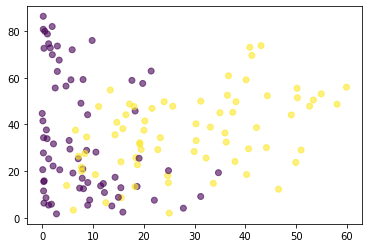

In [286]:
plt.scatter(df1.telephone, df1.export, c=df1.culster_labels, alpha = 0.6)

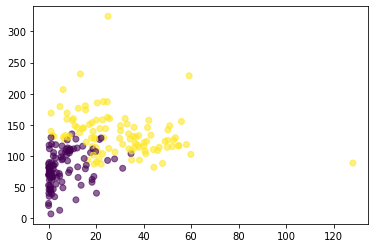

In [287]:
plt.scatter(df1.telephone, df1.mobile, c=df1.culster_labels, alpha = 0.6)

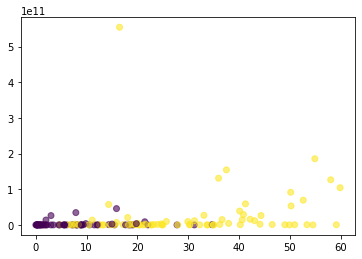

In [288]:
plt.scatter(df1.telephone, df1.hightech, c=df1.culster_labels, alpha = 0.6)

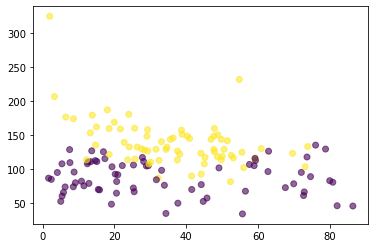

In [289]:
plt.scatter(df1.export, df1.mobile, c=df1.culster_labels, alpha = 0.6)

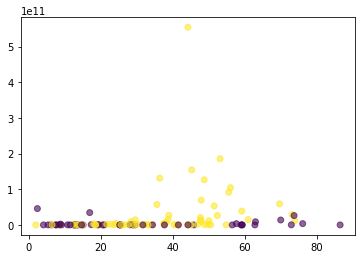

In [290]:
plt.scatter(df1.export, df1.hightech, c=df1.culster_labels, alpha = 0.6)

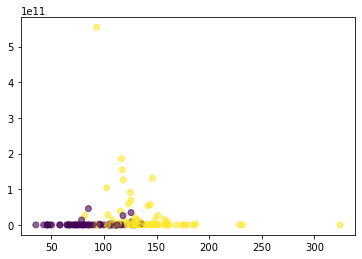

In [291]:
plt.scatter(df1.mobile, df1.hightech, c=df1.culster_labels, alpha = 0.6)

As is seen on the plots, the division on clusters is mainly done on columns "mobile" and "telephone" where difference between clusters is quite clear. The addition of "export"  column to each of them adds some noise but still presents quite a clear division between clusters. However, the values of the column "hightech" are not properly clusterized, so it seems that if this column was removed, the results would be almost the same. Probably, the higher quantity of clusters could solve this problem, but it is presented above that the clustering algorithm proposes the addition of a cluster with only one element which is not really a good choice here, so it seems that 2 clusters is stiil quite a good trade-off at this situation.

# Part II

In [292]:
df2 = pd.read_csv('Video_Games_Sales.csv')
df2

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [293]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [294]:
df2.Name = df2.Name.astype('string')
df2.Publisher = df2.Publisher.astype('string')
df2.Platform = df2.Platform.astype('category')
df2.Genre = df2.Genre.astype('category')
df2.Rating = df2.Rating.astype('category')

## Let us evaluate distribution of each ratio/interval var to further get correlations between columns. Highly correlated variables should not be included into consideration
### Hypotheses:

For each variable in {Year_of_Release,
    NA_Sales,
    EU_Sales,
    JP_Sales,
    Other_Sales,
    Global_Sales,
    Critic_Score,
    Critic_Count,
    User_Count}:

H1: The distribution of the variable is different from the normal distribution

H0: The distribution of the variable is not different from the normal distribution

p-value = 0.05

Kolmogorov test can be used here as the sizes of non-null values in columns is sufficiently high

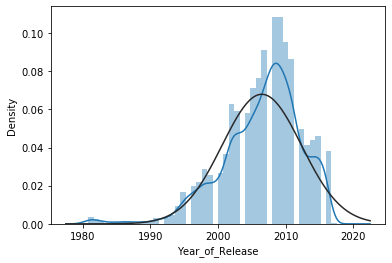

In [295]:
sns.distplot(df2.Year_of_Release.dropna(), fit=norm)

In [296]:
stats.kstest(df2.Year_of_Release.dropna(), 'norm', args=(df2.Year_of_Release.dropna().mean(), df2.Year_of_Release.dropna().std()))

KstestResult(statistic=0.10197750470606431, pvalue=2.179358892702596e-149)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

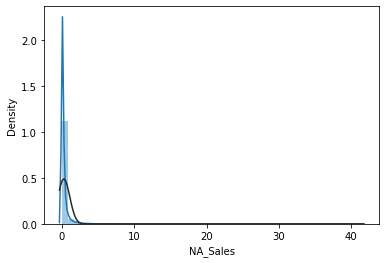

In [297]:
sns.distplot(df2.NA_Sales.dropna(), fit=norm)

In [298]:
stats.kstest(df2.NA_Sales.dropna(), 'norm', args=(df2.NA_Sales.dropna().mean(), df2.NA_Sales.dropna().std()))

KstestResult(statistic=0.37308448671051186, pvalue=0.0)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

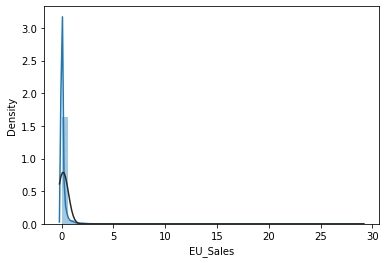

In [299]:
sns.distplot(df2.EU_Sales.dropna(), fit=norm)

In [300]:
stats.kstest(df2.EU_Sales.dropna(), 'norm', args=(df2.EU_Sales.dropna().mean(), df2.EU_Sales.dropna().std()))

KstestResult(statistic=0.3866131159340206, pvalue=0.0)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

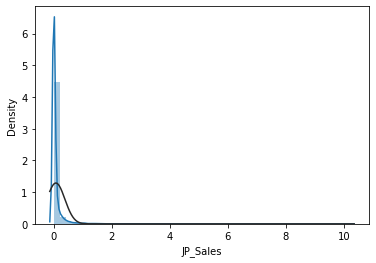

In [301]:
sns.distplot(df2.JP_Sales.dropna(), fit=norm)

In [302]:
stats.kstest(df2.JP_Sales.dropna(), 'norm', args=(df2.JP_Sales.dropna().mean(), df2.JP_Sales.dropna().std()))

KstestResult(statistic=0.40079591197270587, pvalue=0.0)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

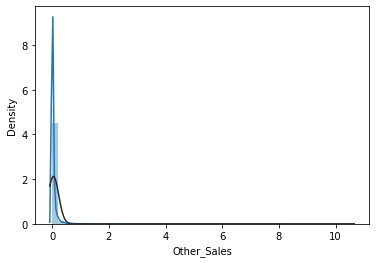

In [303]:
sns.distplot(df2.Other_Sales.dropna(), fit=norm)

In [304]:
stats.kstest(df2.Other_Sales.dropna(), 'norm', args=(df2.Other_Sales.dropna().mean(), df2.Other_Sales.dropna().std()))

KstestResult(statistic=0.3999392352817104, pvalue=0.0)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

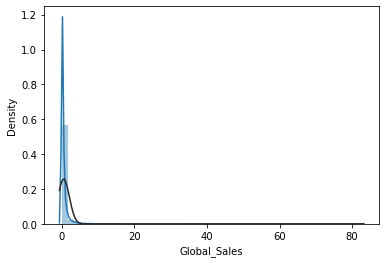

In [305]:
sns.distplot(df2.Global_Sales.dropna(), fit=norm)

In [306]:
stats.kstest(df2.Global_Sales.dropna(), 'norm', args=(df2.Global_Sales.dropna().mean(), df2.Global_Sales.dropna().std()))

KstestResult(statistic=0.3675986884671627, pvalue=0.0)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

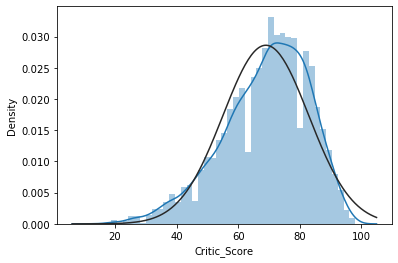

In [307]:
sns.distplot(df2.Critic_Score.dropna(), fit=norm)

In [308]:
stats.kstest(df2.Critic_Score.dropna(), 'norm', args=(df2.Critic_Score.dropna().mean(), df2.Critic_Score.dropna().std()))

KstestResult(statistic=0.0671878653751175, pvalue=2.2142417290873675e-32)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

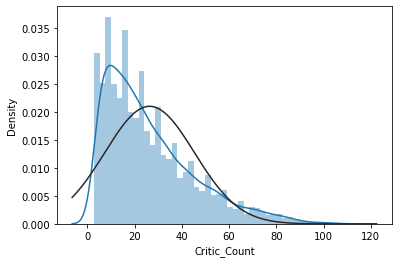

In [309]:
sns.distplot(df2.Critic_Count.dropna(), fit=norm)

In [310]:
stats.kstest(df2.Critic_Count.dropna(), 'norm', args=(df2.Critic_Count.dropna().mean(), df2.Critic_Count.dropna().std()))

KstestResult(statistic=0.11925652222294768, pvalue=2.699062020180487e-101)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

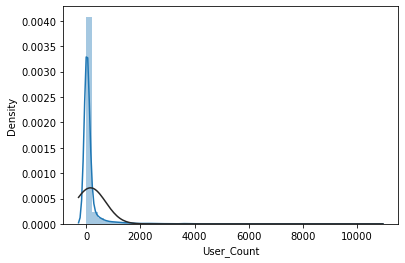

In [311]:
sns.distplot(df2.User_Count.dropna(), fit=norm)

In [312]:
stats.kstest(df2.User_Count.dropna(), 'norm', args=(df2.User_Count.dropna().mean(), df2.User_Count.dropna().std()))

KstestResult(statistic=0.38900707554790426, pvalue=0.0)

### Intermediary results:

All variables are not normally distributed (although some of them seem to be normally distributed, but they are shifted - probably it is the reason of low p-values of Kolmogorov test. That is why, Spearman should be used to measure correlation

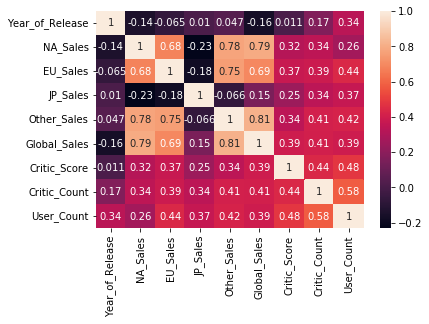

In [313]:
Var_Corr = df2.corr(method="spearman")
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

As it is seen from the heatmap, we have significant correlation between NA_sales, EU_sales, Other_sales, Global_sales. So it is better to take not more than 1 variable from these 4. Critic_count and User_count also have quite significant correlation, so it is better to choose one of them. As for other variables, they have significantly lesser correlation index; thus, it is better to choose variables with greater non-null values count. So, the following columns are chosen:
- Global_Sales
- JP_Sales
- Critic_Score
- Critic_Count

#### Normalizing values

In [314]:
df2['Global_Sales_z'] = (df2['Global_Sales'] - df2['Global_Sales'].mean())/df2['Global_Sales'].std()
df2['JP_Sales_z'] = (df2['JP_Sales'] - df2['JP_Sales'].mean())/df2['JP_Sales'].std()
df2['Critic_Score_z'] = (df2['Critic_Score'] - df2['Critic_Score'].mean())/df2['Critic_Score'].std()
df2['Critic_Count_z'] = (df2['Critic_Count'] - df2['Critic_Count'].mean())/df2['Critic_Count'].std()

#### Replacing NaN with mean

In [315]:
df2[['Global_Sales_z','JP_Sales_z','Critic_Score_z','Critic_Count_z']] = df2[['Global_Sales_z','JP_Sales_z','Critic_Score_z','Critic_Count_z']].fillna(df2[['Global_Sales_z','JP_Sales_z','Critic_Score_z','Critic_Count_z']].mean())

### Finding optimal number of clusters through Calinski-Harabasz score

In [316]:
X = df2[['Global_Sales_z','JP_Sales_z','Critic_Score_z','Critic_Count_z']]
for k in range (2, 15):
    labels = KMeans(n_clusters=k).fit_predict(X)
    print('Number of clusters: {}, index {}'.format(k, calinski_harabasz_score(X, labels)))

Number of clusters: 2, index 7334.192689258354
Number of clusters: 3, index 6660.244245779713
Number of clusters: 4, index 6497.326784949367
Number of clusters: 5, index 6881.142619472777
Number of clusters: 6, index 6622.0110721555775
Number of clusters: 7, index 6607.607828338135
Number of clusters: 8, index 6525.598288478797
Number of clusters: 9, index 6629.243589154538
Number of clusters: 10, index 6562.73517049502
Number of clusters: 11, index 6546.37889039737
Number of clusters: 12, index 6570.931917823287
Number of clusters: 13, index 6609.034219318995
Number of clusters: 14, index 6603.570711085341


According to the results, the appropriate number of clusters is 2. All the bigger numbers up to 15 have a lesser index.

In [317]:
kmeans_model = KMeans(n_clusters=2).fit_predict(X)

In [318]:
df2['Clusters'] = kmeans_model

In [319]:
df2['Clusters'].value_counts()

0    16575
1      144
Name: Clusters, dtype: int64

Unfortunately, the division on clusters is not really proportional, but all the greater number of clusters up to 15 have a lesser Calinski-Harabasz index, so probably it is still the best division, which we can obtain

In [320]:
df2.to_csv('Video_Games_Sales_Upd.csv')

### Cluster description

In [321]:
df2[['Global_Sales','JP_Sales','Critic_Score','Critic_Count','Clusters']].groupby('Clusters')[['Global_Sales','JP_Sales','Critic_Score','Critic_Count']].mean()

,Global_Sales,JP_Sales,Critic_Score,Critic_Count
Clusters,,,,
0,0.444241,0.056934,68.819410,26.106842
1,10.812500,2.456597,86.304348,56.057971


In [322]:
groupped_data = df2[['Global_Sales','JP_Sales','Critic_Score','Critic_Count','Clusters']].groupby('Clusters')

In [323]:
groupped_data.get_group(0).describe()

,Global_Sales,JP_Sales,Critic_Score,Critic_Count,Clusters
count,16575.000000,16575.000000,8068.000000,8068.000000,16575.0
mean,0.444241,0.056934,68.819410,26.106842,0.0
std,0.808737,0.158770,13.881254,18.745957,0.0
min,0.010000,0.000000,13.000000,3.000000,0.0
25%,0.060000,0.000000,60.000000,12.000000,0.0
50%,0.170000,0.000000,71.000000,21.000000,0.0
75%,0.450000,0.030000,79.000000,36.000000,0.0
max,11.010000,1.750000,98.000000,113.000000,0.0


In [324]:
groupped_data.get_group(1).describe()

,Global_Sales,JP_Sales,Critic_Score,Critic_Count,Clusters
count,144.000000,144.000000,69.000000,69.000000,144.0
mean,10.812500,2.456597,86.304348,56.057971,1.0
std,9.848844,1.574514,8.795561,22.642934,0.0
min,2.090000,0.060000,58.000000,8.000000,1.0
25%,4.865000,1.512500,83.000000,41.000000,1.0
50%,7.790000,2.185000,88.000000,58.000000,1.0
75%,13.520000,3.157500,93.000000,73.000000,1.0
max,82.530000,10.220000,98.000000,100.000000,1.0


Here the situation is pretty clear and cluster division is affected by all the variables. It is seen than games in the cluster 0 have significantly less sales both globally and in Japan, they also have lower critic scores as well as critic counts in comparison with the games from the cluster 2, where all these values are quite high. Global sales of games from the cluster 0 are at average not more then 500 000 dollars and sales in Japan are in 75% not more than 30 000 dollars. In comparison, global sales of games from the cluster 1 are at average more than 10 000 000 dollars whiles sales in Japan are in 75% more than 3 000 000 dollars. The average critic count for the games in the cluster 0 is quite low in comparison with the critic count on games from the cluster 1: 26 in the cluster 0 and 56 in the cluster 1. The situation with the critic score is nearly the same: games from the cluster 1 tend to get better scores from the critics than the games from the cluster 0, and the difference is nearly 13.5 at average.
According to descriptions of these groups, it is seen that the significant dispersion exists in all variables in both clusters but it is not seen as an obstacle in a mostly clear division of clusters by the chosen variables (especially if we talk about values in the diapason from 25 to 75 percentiles). However, it is seen that there are some outliers in "Critic_Score" and "Critic_Count" for which this cluster division may seem not appropriate.

### Cluster names

According to the results of the analysis, the following names are proposed to the clusters:

1 - "Popular and highly rated games" (due to high sales and high critic scores and counts)

2 - "Unpopular and moderately rated games" (due to low sales and moderate critic scores and counts)

### Post-hoc analysis

Let us check column by column how the clusters are presented to evaluate how correct was the choice of a cluster number as well as the result of clustering

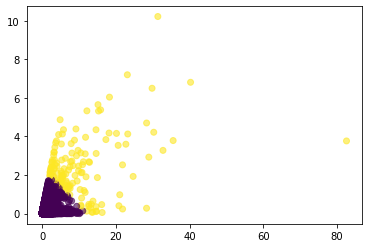

In [325]:
plt.scatter(df2.Global_Sales, df2.JP_Sales, c=df2.Clusters, alpha = 0.6)

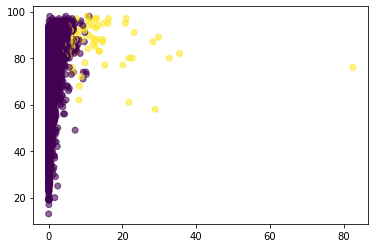

In [326]:
plt.scatter(df2.Global_Sales, df2.Critic_Score, c=df2.Clusters, alpha = 0.6)

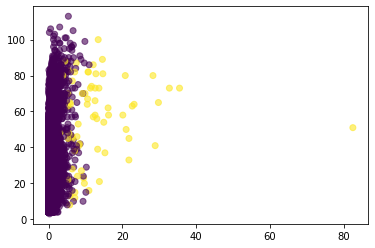

In [327]:
plt.scatter(df2.Global_Sales, df2.Critic_Count, c=df2.Clusters, alpha = 0.6)

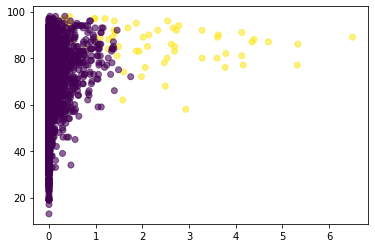

In [328]:
plt.scatter(df2.JP_Sales, df2.Critic_Score, c=df2.Clusters, alpha = 0.6)

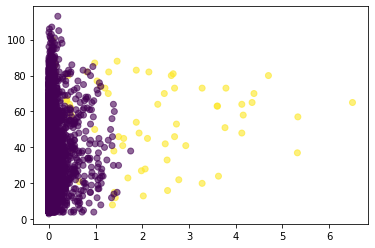

In [329]:
plt.scatter(df2.JP_Sales, df2.Critic_Count, c=df2.Clusters, alpha = 0.6)

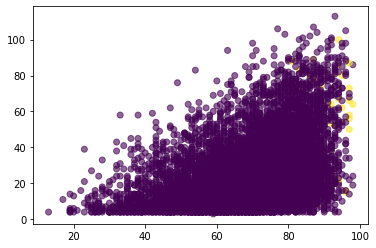

In [330]:
plt.scatter(df2.Critic_Score, df2.Critic_Count, c=df2.Clusters, alpha = 0.6)

As is seen, the clearest division is on variables "Global_Sales", "JP_Sales" - the values almost do not intersect here. The worst result is seen on the plot "Critic_Score", "Critic_Count", where the values are mostly mixed with each other, but probably it is simply due to the fact that the number of values in the cluster 0 is 100 times larger than the number of values in the cluster 2, so some extremums (whose amount can be quite large) in the cluster 0 can overlap on the plot the main values in the cluster 1. Indeed, according to the description of clusters, the values from 25 to 75 percentiles are totally disjoint for both these variables.
As for the other combinations of variables, the separation of clusters is quite clear but still some overlappings exist, so it can be said that the clustering is done properly and the choice for 2 clusters is indeed appropriate